# Opdracht 4 - KNMI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename1 = '../datasets/KNMI/etmgeg_260.txt'
filename2 = '../datasets/KNMI/etmgeg_279.txt'

In [10]:
df1 = pd.read_csv(filename1, skiprows=51, dtype='string', skipinitialspace=True)
df1.head()

,# STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,260,19010101,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,66,<NA>,<NA>,<NA>,<NA>,<NA>
1,260,19010102,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,86,<NA>,<NA>,<NA>,<NA>,<NA>
2,260,19010103,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,89,<NA>,<NA>,<NA>,<NA>,<NA>
3,260,19010104,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,79,<NA>,<NA>,<NA>,<NA>,<NA>
4,260,19010105,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,65,<NA>,<NA>,<NA>,<NA>,<NA>


In [21]:
df2 = pd.read_csv(filename2, skiprows=51, dtype='string', skipinitialspace=True)
df2.head()

,# STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,279,19890101,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,279,19890102,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,279,19890103,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,279,19890104,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,279,19890105,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [18]:
df_260 = df1.loc[df1['YYYYMMDD'].str.startswith('2023'), ['# STN', 'YYYYMMDD', 'TG']].reset_index(drop=True).copy()
df_260

,# STN,YYYYMMDD,TG
0,260,20230101,124
1,260,20230102,88
2,260,20230103,63
3,260,20230104,116
4,260,20230105,108
...,...,...,...
360,260,20231227,70
361,260,20231228,109
362,260,20231229,93
363,260,20231230,81


In [22]:
df_279 = df2.loc[df2['YYYYMMDD'].str.startswith('2023'), ['# STN', 'YYYYMMDD', 'TG']].reset_index(drop=True).copy()
df_279

,# STN,YYYYMMDD,TG
0,279,20230101,122
1,279,20230102,84
2,279,20230103,51
3,279,20230104,108
4,279,20230105,97
...,...,...,...
360,279,20231227,53
361,279,20231228,104
362,279,20231229,87
363,279,20231230,69


In [24]:
df = pd.concat([df_260, df_279])
df

,# STN,YYYYMMDD,TG
0,260,20230101,124
1,260,20230102,88
2,260,20230103,63
3,260,20230104,116
4,260,20230105,108
...,...,...,...
360,279,20231227,53
361,279,20231228,104
362,279,20231229,87
363,279,20231230,69


In [26]:
df['datum'] = pd.to_datetime(df['YYYYMMDD'])

In [31]:
df['temp'] = df['TG'].astype('int') * 0.1

In [35]:
df_pivoted = df.pivot(index='datum', columns='# STN', values='temp')
df_pivoted

# STN,260,279
datum,,
2023-01-01,12.4,12.2
2023-01-02,8.8,8.4
2023-01-03,6.3,5.1
2023-01-04,11.6,10.8
2023-01-05,10.8,9.7
...,...,...
2023-12-27,7.0,5.3
2023-12-28,10.9,10.4
2023-12-29,9.3,8.7


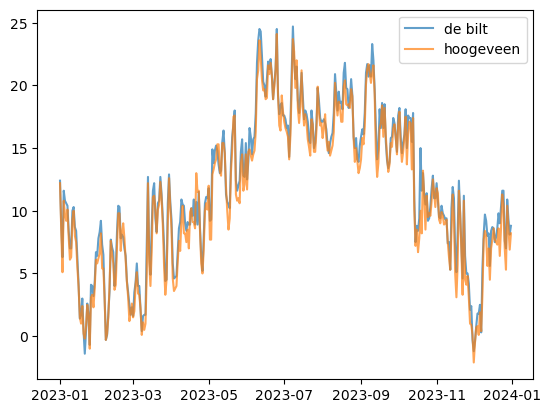

In [46]:
plt.plot(df_pivoted['260'], alpha=0.7, label='de bilt')
plt.plot(df_pivoted['279'], alpha=0.7, label='hoogeveen')
plt.legend()
plt.show()

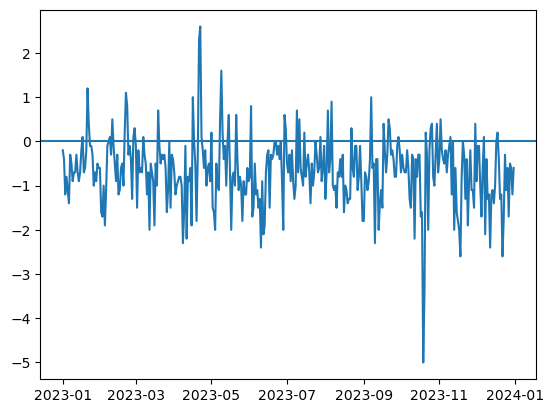

In [51]:
diff = df_pivoted['279'] - df_pivoted['260']

plt.plot(diff)
plt.axhline(0)
plt.show()

In [52]:
diff.mean()

-0.6750684931506848

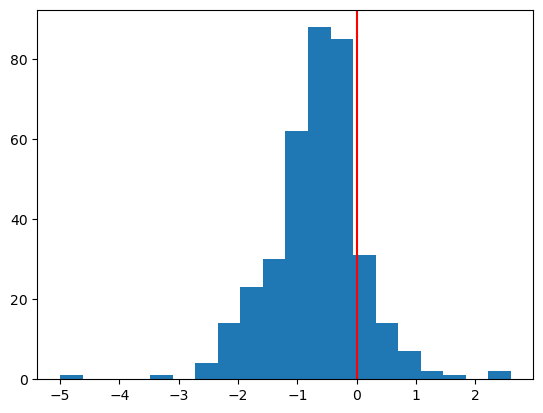

In [57]:
plt.hist(diff, bins=20)
plt.axvline(0, color='red')
plt.show()